## 套件介紹
![未能顯示](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTs4P2pPxEDJphtctVrXjQKIDrW8owvA9ev7g&s)

### 1. ultralytics
ultralytics 是專為 YOLOv8（You Only Look Once, version 8）開發的官方 Python 套件，主要用於物件偵測 (Object Detection)、影像分割 (Image Segmentation) 和影像分類 (Image Classification) 任務。這個版本在模型準確度、速度和易用性上做了顯著提升。

核心功能：
模型加載和訓練：支援模型從頭訓練 (Training) 或使用預訓練模型 (Pre-trained Models)。
推論 (Inference)：提供簡單的 .predict() 方法進行圖片或影片的推論。
繪圖工具：內建 .plot() 方法，可以輕鬆顯示偵測結果。
模型導出：支援導出模型到不同格式（如 ONNX、TensorRT、CoreML 等）。
自訂數據集：方便的數據集標註和格式轉換工具。

### 2. UltralyticsPlus (ultralyticsplus 套件)
ultralyticsplus 是由 Foduu.com 開發的擴充套件，它建立在 YOLOv8 之上，提供更多高階功能和易用的 API，適合更廣泛的電腦視覺 (Computer Vision) 應用。

核心功能：
增強的模型庫：支援更多模型（不僅限於 YOLO），如其他社區貢獻的模型。
快速上手：只需簡單幾行代碼就能加載模型和進行推論。
多模型支援：除了 YOLO 之外，還支援其他開源模型（如 Segmentation、Classification 模型）。
圖片渲染工具 (render_result)：能夠在圖片上直觀地顯示偵測結果。
與 Hugging Face Hub 集成：可以方便地從 Hugging Face 模型倉庫加載模型。



## 為什麼要學這個?
你想的到的各種影像視覺任務，都很有可能在huggingFace上找到相應的預訓練模型，包括但不限於
1. 貓狗辨識
2. 煙霧偵測
3. 語意識別
4. NER(命名實體識別): 簡單來說就是專有名詞識別，人名 (Person)、地點 (Location)、組織 (Organization)、時間、貨幣等等
5. 火災偵測
6. 嬰兒怎麼又哭了 (https://huggingface.co/foduucom/baby-cry-classification)

如果你需要做相關的應用，甚至配合生成式AI的agent開發應用，huggingFace可以節省大量的時間


In [ ]:
# 安裝套件 -q表示不顯示下載進度、狀態
!pip -q install ultralyticsplus==0.0.28 ultralytics==8.0.43


In [ ]:
# 下載範例檔案
!wget https://raw.githubusercontent.com/June103310110/open_ai_course/refs/heads/main/data/yolov8_leaf_example.jpeg

--2025-03-09 10:56:46--  https://raw.githubusercontent.com/June103310110/open_ai_course/refs/heads/main/data/yolov8_leaf_example.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24797 (24K) [image/jpeg]
Saving to: ‘yolov8_leaf_example.jpeg’

yolov8_leaf_example 100%[===================>]  24.22K  --.-KB/s    in 0.002s  

2025-03-09 10:56:46 (10.3 MB/s) - ‘yolov8_leaf_example.jpeg’ saved [24797/24797]



## foduucom/plant-leaf-detection-and-classification (Yolov8專案)

這個特定的模型已經被訓練用來識別和分類不同植物種類的葉子。它能夠在影像中偵測出多個葉子實例，並將它們分配到各自的類別中。

> ['ginger', 'banana', 'tobacco', 'ornamaental', 'rose', 'soyabean', 'papaya', 'garlic', 'raspberry', 'mango', 'cotton', 'corn', 'pomgernate', 'strawberry', 'Blueberry', 'brinjal', 'potato', 'wheat', 'olive', 'rice', 'lemon', 'cabbage', 'gauava', 'chilli', 'capcicum', 'sunflower', 'cherry', 'cassava', 'apple', 'tea', 'sugarcane', 'groundnut', 'weed', 'peach', 'coffee', 'cauliflower', 'tomato', 'onion', 'gram', 'chiku', 'jamun', 'castor', 'pea', 'cucumber', 'grape', 'cardamom']

Developed by: FODUU AI
Model type: Object Detection

> 可用待測項目翻譯翻譯

[
    '薑',
    '香蕉',
    '煙草',
    '觀賞植物',
    '玫瑰',
    '大豆',
    '木瓜',
    '大蒜',
    '覆盆子',
    '芒果',
    '棉花',
    '玉米',
    '石榴',
    '草莓',
    '藍莓',
    '茄子',
    '馬鈴薯',
    '小麥',
    '橄欖',
    '稻米',
    '檸檬',
    '高麗菜',
    '番石榴',
    '辣椒',
    '甜椒',
    '向日葵',
    '櫻桃',
    '木薯',
    '蘋果',
    '茶',
    '甘蔗',
    '花生',
    '雜草',
    '桃子',
    '咖啡',
    '花椰菜',
    '番茄',
    '洋蔥',
    '鷹嘴豆',
    '人參果 (Chiku)',
    '爪哇李 (Jamun)',
    '蓖麻',
    '豌豆',
    '黃瓜',
    '葡萄',
    '豆蔻'
]


### 主要程式碼說明
- from ultralyticsplus import YOLO, render_result: 這行程式碼從 ultralyticsplus 函式庫中導入了 YOLO 和 render_result 兩個函式。YOLO 用於載入和使用 YOLO 模型進行物件偵測，而 render_result 則用於顯示偵測結果。
- model = YOLO('foduucom/plant-leaf-detection-and-classification'): 這行程式碼載入了一個預先訓練好的 YOLO 模型，用於植物葉子偵測和分類。模型的名稱為 'foduucom/plant-leaf-detection-and-classification'，表示它來自於 FODUU AI 並且專門用於植物葉子。
- 這段程式碼設定了模型的一些參數，這些參數會影響模型的偵測結果：
  - model.overrides['conf'] = 0.25: 設定 置信度閾值 為 0.25。只有置信度高於這個閾值的偵測結果才會被保留。
  - model.overrides['iou'] = 0.45: 設定 IoU 閾值 為 0.45。IoU (Intersection over Union) 是用於衡量兩個邊界框重疊程度的指標。如果兩個邊界框的 IoU 高於這個閾值，則它們會被視為同一個物件。
  - model.overrides['agnostic_nms'] = False: 設定 非類別特定 的非極大值抑制 (NMS)。這表示 NMS 會在所有類別中進行，而不是在每個類別中分別進行。
  [連結文字](https://)- model.overrides['max_det'] = 1000: 設定每張圖片 最多偵測到的物件數量 為 1000。

In [ ]:

from ultralyticsplus import YOLO, render_result


# load model
model = YOLO('foduucom/plant-leaf-detection-and-classification')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image


# set image
image = 'yolov8_leaf_example.jpeg'

# perform inference
results = model.predict(image)

# observe results
print(results[0].boxes)
render = render_result(model=model, image=image, result=results[0])
render.show()


/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:340: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


tensor([[1.00000e+00, 0.00000e+00, 1.40000e+02, 6.30000e+01, 6.81879e-01, 1.00000e+00],
        [0.00000e+00, 2.51000e+02, 1.02000e+02, 3.40000e+02, 3.88329e-01, 1.00000e+00],
        [1.65000e+02, 1.00000e+00, 4.25000e+02, 2.51000e+02, 3.03498e-01, 1.00000e+00],
        [7.00000e+01, 6.00000e+01, 2.21000e+02, 3.25000e+02, 2.80217e-01, 1.00000e+00]])


### 請嘗試看看colab的說明程式碼
1. 選中程式碼區塊
2. 點擊可用AI功能
3. 點擊說明程式碼


array([[[151, 157, 255],
        [151, 157, 255],
        [151, 157, 255],
        ...,
        [191, 167, 145],
        [191, 167, 145],
        [192, 168, 146]],

       [[151, 157, 255],
        [151, 157, 255],
        [151, 157, 255],
        ...,
        [192, 168, 146],
        [193, 169, 147],
        [193, 169, 147]],

       [[151, 157, 255],
        [151, 157, 255],
        [151, 157, 255],
        ...,
        [193, 169, 147],
        [194, 170, 148],
        [194, 170, 148]],

       ...,

       [[151, 157, 255],
        [151, 157, 255],
        [ 40,  77,  90],
        ...,
        [218, 204, 186],
        [218, 204, 186],
        [217, 203, 185]],

       [[151, 157, 255],
        [151, 157, 255],
        [ 63,  94, 124],
        ...,
        [218, 204, 186],
        [218, 204, 186],
        [217, 203, 185]],

       [[151, 157, 255],
        [151, 157, 255],
        [151, 157, 255],
        ...,
        [218, 204, 186],
        [218, 204, 186],
        [217, 203, 185]]], dtype=uint8)
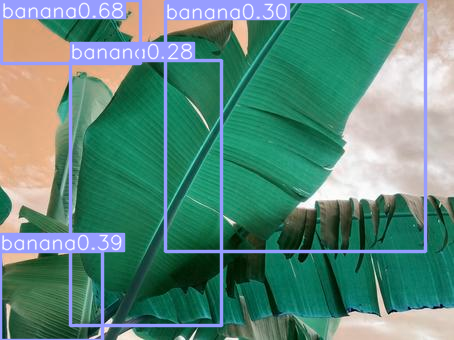

In [ ]:
results[0].plot()

## 生成程式碼練習
使用opencv對model的預測結果畫圖

目標: 使用 OpenCV 根據 YOLO 模型的預測結果，將預測的物件 (例如葉子或水果) 以紅色邊界框和標籤文字繪製在圖片上。

具體需求:

模型輸出格式: 預測結果包含 Bounding Box (x_min, y_min, x_max, y_max)、置信度 (confidence) 和類別名稱 (label)。
顯示效果:
使用 OpenCV 繪製紅色的矩形邊界框 (BGR 顏色值為 (0, 0, 255))。
在每個邊界框上顯示類別名稱和置信度，字體顏色為白色，字體有黑色背景以提升可讀性。
圖片格式: 原始圖片可以是本地檔案或通過 URL 加載。
最終呈現: 顯示帶有標註的圖片，並可選擇將結果保存成新的圖片文件。

注意事項: 因為我是在colab上實作，請使用from google.colab.patches import cv2_imshow